### HUM-DATA-COVID-19-DATASET

- FILTER SPECIFIC COUNTRY CASES
- FILTER SPECIFIC COUNTRY DEATHS
- FILTER SPECIFIC COUNTRY RECOVERIES
<HR>
- PLOT CASES DEATHS AND RECOVERIES FOR ONE COUNTRY
- PLOT CASES FOR MULTIPLE COUNTRIES
<HR>
- RUN REGRESSION FOR PREDICTION IN COUNTRIES.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")

In [2]:
# LOAD THE 3 CSV INTO PANDAS DATAFRAMES

In [3]:
cases = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
recoveries = pd.read_csv("time_series_covid19_recovered_global.csv")

FileNotFoundError: [Errno 2] File time_series_covid19_confirmed_global.csv does not exist: 'time_series_covid19_confirmed_global.csv'

In [ ]:
cases.head()

In [ ]:
# FILTER SPECIFIC COUNTRIES

In [ ]:
target_country_cases = cases[cases["Country/Region"] == "Nigeria"]
target_country_cases

In [ ]:
cases_dates = cases.columns[4:] # SLICE OFF NON-DATE COLUMN NAMES
cases_values = target_country_cases.iloc[0][4:]

In [ ]:
plt.plot(cases_dates, cases_values)
plt.show()

In [ ]:
target_country_deaths = deaths[deaths["Country/Region"] == "Ghana"]
target_country_deaths

In [ ]:
deaths_dates = deaths.columns[4:] # SLICE OFF NON-DATE COLUMN NAMES
deaths_values = target_country_deaths.iloc[0][4:]
target_country_deaths

In [ ]:
plt.plot(deaths_dates, deaths_values)
plt.show()

In [ ]:
target_country_recoveries = recoveries[recoveries["Country/Region"] == "Ghana"]
recoveries_dates = target_country_recoveries.columns[4:] # SLICE OFF NON-DATE COLUMN NAMES
recoveries_values = target_country_recoveries.iloc[0][4:]

plt.plot(recoveries_dates, recoveries_values)
plt.show()

In [ ]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(cases_dates, cases_values, label = "cases")
plt.plot(deaths_dates, deaths_values, label = "deaths")
plt.plot(recoveries_dates, recoveries_values, label = "recoveries")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

In [ ]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(cases_dates, cases_values, label = "cases")
plt.plot(deaths_dates, deaths_values, label = "deaths")
plt.plot(recoveries_dates, recoveries_values, label = "recoveries")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

In [ ]:
country1_recoveries = cases[cases["Country/Region"] == "Nigeria"]
country2_recoveries = cases[cases["Country/Region"] == "Ghana"]
country3_recoveries = cases[cases["Country/Region"] == "Togo"]

country1_recoveries_dates = country1_recoveries.columns[4::10] # SLICE OFF NON-DATE COLUMN NAMES
country1_recoveries_values = country1_recoveries.iloc[0][4::10]

country2_recoveries_dates = country2_recoveries.columns[4::10] # SLICE OFF NON-DATE COLUMN NAMES
country2_recoveries_values = country2_recoveries.iloc[0][4::10]

country3_recoveries_dates = country3_recoveries.columns[4::10] # SLICE OFF NON-DATE COLUMN NAMES
country3_recoveries_values = country3_recoveries.iloc[0][4::10]

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k') # ALTER SIZE OF PLOT 

plt.plot(country1_recoveries_dates, country1_recoveries_values, label = "Nigeria")
plt.plot(country2_recoveries_dates, country2_recoveries_values, label = "Ghana")
plt.plot(country3_recoveries_dates, country3_recoveries_values, label = "Togo")

plt.xticks(rotation=45) # ROTATE XLABELS
plt.legend()
plt.show()

In [ ]:
country3_values = country3_recoveries_values.reset_index(drop=True).astype("int")
country3_values

country3_dates_numeric_representation = list(range(len(country3_recoveries_dates)))

dataframe = pd.DataFrame({"dates":country3_dates_numeric_representation, "values":country3_values}).reset_index()

sns.lmplot("dates", "values", data = dataframe, fit_reg=True, order = 2)
plt.show()

In [ ]:
names = ["ade", "jonah", "kunle", "saheed", "sulah", "john", "mo", "spendin", "tina","queen"]
reading_hours = [4, 5, 1, 5, 7, 8, 2, 7, 3, 9]
exam_scores = [56, 61, 22, 66, 69, 78, 27, 70, 29, 95]
weight = [70, 120, 55, 55, 67, 90, 50, 70, 56, 58]

In [ ]:
students_frame = pd.DataFrame(dict(names = names, hours = reading_hours, score = exam_scores, weight = weight))

In [ ]:
plt.figure(num=None, figsize=(20, 6)) 
sns.lmplot("hours", "score", data = students_frame, fit_reg = True)
# sns.regplot("weight", "score", data = students_frame, fit_reg = True)
plt.show()

In [ ]:
students_frame.corr() # PEARSON'S CORRELATION COEFFICIENT 

In [ ]:
sns.heatmap(students_frame.corr())
plt.show()

In [ ]:
correlation_coefficient = students_frame.corr()["hours"].loc["score"]

In [ ]:
#Y = MX+C
# C = Y - (M x X)
# dependent_variable(score) = rate_of_change_of_hours-scores * independent_variable + point where line crosses the score axis

In [ ]:
56 - (correlation_coefficient * 4)

In [ ]:
X = 7

In [ ]:
correlation_coefficient * X + 52.14286503117553

In [ ]:
students_frame.corr()

In [ ]:
correlation_coefficient = students_frame.corr()["hours"].loc["score"]
std_y = students_frame["score"].std()
std_x = students_frame["hours"].std()

In [ ]:
deviation_ratio = std_y/std_x 
slope = correlation_coefficient * deviation_ratio # GET VALUE FOR SLOPE (M) 
slope

In [ ]:
# Y = MX+C ORIGINAL FORMULA
# C = Y - MX CHANGED SUBJECT OF FORMULA
intercept = students_frame["score"].mean() - slope * students_frame["hours"].mean()

In [ ]:
intercept

In [ ]:
formula = lambda x: (slope*x)+ intercept 

def func(x):
    y = (slope*x)+ intercept 
    return y

test_vals = [formula(x) for x in reversed(range(10, -3, -1))]


In [ ]:
plt.plot(list(reversed(range(10, -3, -1))), test_vals)
plt.scatter(students_frame["hours"], students_frame["score"])
plt.plot()

In [ ]:
students_frame

In [ ]:
func(8)

In [ ]:
# ANOTHER SAMPLE FOR LINEAR REG 

In [ ]:
x = [0, 5, 10, 15, 20, 25, 30, 35]
y = [0, 1, 2, 3, 4, 5, 6, 7]
# y.reverse()
data = pd.DataFrame({"x":x, "y":y})

plt.scatter(data.x, data.y)

In [ ]:
r = data.corr() # GET PEARSONS CORRELATION COEFFICIENT 
r = r.x.iloc[1]
r

In [ ]:
deviation_ratio = data.y.std()/data.x.std()
slope = r * deviation_ratio # GET VALUE FOR SLOPE (M) 
intercept = data["y"].mean() - slope * data["x"].mean()
print(intercept, slope)

In [42]:
int(slope*35 + intercept)

7

In [ ]:
# USE SAME CONCEPT ON AUTO DATA

In [25]:
dataset = pd.read_csv("auto_insurance_sweden (1).csv")

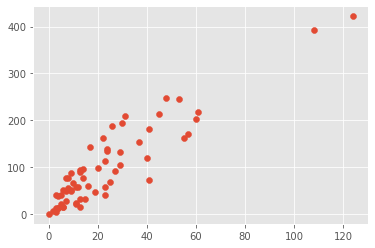

In [47]:
plt.scatter(dataset["number of claims"], dataset["total payments"])

In [57]:
r = dataset.corr()["total payments"].iloc[0] # GET R-VALUE OR PEARSON'S CORRELATION COEFICIENT
dataset.corr()
# r

,number of claims,total payments
number of claims,1.000000,0.912878
total payments,0.912878,1.000000


No handles with labels found to put in legend.


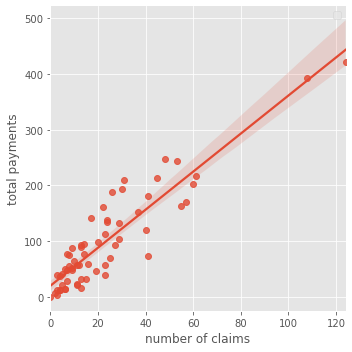

In [49]:
sns.lmplot("number of claims", "total payments", dataset)

In [58]:
deviation_ratio = dataset["total payments"].std()/dataset["number of claims"].std()
slope = r * deviation_ratio # GET VALUE FOR SLOPE (M) 
intercept = dataset["total payments"].mean() - slope * dataset["number of claims"].mean()
print(intercept, slope)

19.99448575911478 3.413823560066368


In [63]:
int(slope*124 + intercept)

443

In [61]:
dataset

,number of claims,total payments
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [ ]:
### deviation_ratio = std_y/std_x 
slope = correlation_coefficient * deviation_ratio # GET VALUE FOR SLOPE (M) 
# Y = MX+C ORIGINAL FORMULA
# C = Y - MX CHANGED SUBJECT OF FORMULA
intercept = students_frame["score"].mean() - slope * students_frame["hours"].mean()
formula = lambda x: (slope*x)+ intercept 

def func(x):
    y = (slope*x)+ intercept 
    return y

test_vals = [formula(x) for x in reversed(range(10, -3, -1))]

plt.plot(list(reversed(range(10, -3, -1))), test_vals)
plt.scatter(students_frame["hours"], students_frame["score"])
plt.plot()

In [1]:
# PORVERTY TO BIRTH RATE DATA SET LINEAR REGRESSION


In [6]:
dataset = pd.read_csv("Adolescent_Births_2010-2012.csv")

In [7]:
dataset

,YEAR,COUNTY,MSSA_ID,MSSA_NAME,MSSA_TYPE,Race_ethnicity,Population,Adolescent_births,Indicator,Annotation,Indicator_rate,Indicator_ll,Indicator_ul
0,2010-2012,Modoc,100,Adin/Lookout/Newell,Frontier,ASIAN,0,0.0,ABR,NaN,0.0,NaN,NaN
1,2010-2012,Modoc,100,Adin/Lookout/Newell,Frontier,ASIAN,0,0.0,PRB,NaN,0.0,NaN,NaN
2,2010-2012,Modoc,100,Adin/Lookout/Newell,Frontier,ASIAN,0,0.0,PBHP,NaN,0.0,NaN,NaN
3,2010-2012,Modoc,100,Adin/Lookout/Newell,Frontier,BLACK,0,0.0,ABR,NaN,0.0,NaN,NaN
4,2010-2012,Modoc,100,Adin/Lookout/Newell,Frontier,BLACK,0,0.0,PRB,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,2010-2012,Modoc,99,Surprise Valley,Frontier,ALL,97,NaN,PRB,2.0,NaN,NaN,NaN
8126,2010-2012,Modoc,99,Surprise Valley,Frontier,ALL,97,NaN,PBHP,2.0,0.0,NaN,NaN
8127,2010-2012,Modoc,99,Surprise Valley,Frontier,WHITE,53,NaN,ABR,2.0,NaN,NaN,NaN
8128,2010-2012,Modoc,99,Surprise Valley,Frontier,WHITE,53,NaN,PRB,2.0,NaN,NaN,NaN


In [36]:
dataset[["Race_ethnicity","Population","Adolescent_births"]].groupby("Race_ethnicity").corr()

Population  Adolescent_births
Race_ethnicity                                                 
ALL            Population           1.000000           0.720475
               Adolescent_births    0.720475           1.000000
ASIAN          Population           1.000000           0.474111
               Adolescent_births    0.474111           1.000000
BLACK          Population           1.000000           0.897731
               Adolescent_births    0.897731           1.000000
HISP           Population           1.000000           0.931971
               Adolescent_births    0.931971           1.000000
WHITE          Population           1.000000           0.414688
               Adolescent_births    0.414688           1.000000

In [12]:
grouped_data = dataset[["Race_ethnicity","Population","Adolescent_births"]].groupby("Race_ethnicity")

In [23]:
grouped_data.groups.keys()

dict_keys(['ALL', 'ASIAN', 'BLACK', 'HISP', 'WHITE'])

In [38]:
new_dict = {"RACE":[], "POP-BIRTH RELATIONSHIP":[]}

for race in grouped_data.groups.keys():
    
    race_CORRELATION = grouped_data.get_group(race).corr().Population.iloc[1]
    new_dict["RACE"].append(race)
    new_dict["POP-BIRTH RELATIONSHIP"].append(race_CORRELATION)
print(new_dict)

{'RACE': ['ALL', 'ASIAN', 'BLACK', 'HISP', 'WHITE'], 'POP-BIRTH RELATIONSHIP': [0.720474949610708, 0.4741112047301059, 0.8977308826645487, 0.9319712267085862, 0.4146878471992894]}


In [40]:
pd.DataFrame(new_dict).sort_values("POP-BIRTH RELATIONSHIP", ascending = False)

,RACE,POP-BIRTH RELATIONSHIP
3,HISP,0.931971
2,BLACK,0.897731
0,ALL,0.720475
1,ASIAN,0.474111
4,WHITE,0.414688


In [42]:
dataset[["MSSA_TYPE", "Race_ethnicity","Population","Adolescent_births"]].groupby("Race_ethnicity").sum()

,Population,Adolescent_births
Race_ethnicity,,
ALL,12294963,343038.0
ASIAN,1336269,6081.0
BLACK,782394,25614.0
HISP,5953029,252639.0
WHITE,3674706,40251.0


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [150]:
model = LinearRegression(n_jobs = 10)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(students_frame.hours, students_frame.score, test_size=1, random_state=10)


In [152]:
model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

LinearRegression(n_jobs=10)

In [153]:
model.predict([[2]])

array([[32.53256705]])

In [154]:
model.intercept_

array([15.78544061])

In [155]:
model.coef_

array([[8.37356322]])